<a href="https://colab.research.google.com/github/boing-86/ML_study/blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


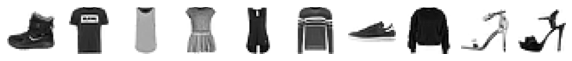

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)
fig, axs = plt.subplots(1, 10, figsize = (10, 10))

for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')

plt.show()

print([train_target[i] for i in range(10)])
print(np.unique(train_target, return_counts=True))

In [ ]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [45]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

#sc = SGDClassifier(loss='log', max_iter=9, random_state=42)
#scores = cross_validate(sc, train_scaled, train_target, n_jobs=1)
#print(np.mean(scores['test_score']))

(60000, 784)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

print(train_scaled.shape, train_target.shape)

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 5)
model.evaluate(val_scaled, val_target)

model.summary()

(48000, 784) (48000,)
Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6139 - accuracy: 0.7903
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4802 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4561 - accuracy: 0.8473
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8527
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.8404
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5672 - accuracy: 0.8067
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4057 - accuracy: 0.8556
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3702 - accuracy: 0.8656
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3480 - accuracy: 0.8739
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8767


[0.3523297905921936, 0.8766666650772095]

In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5236 - accuracy: 0.8145
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3909 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3542 - accuracy: 0.8738
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8799
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8794


[0.3568336069583893, 0.8794166445732117]

In [ ]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'sgd', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8007 - accuracy: 0.7438
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5389 - accuracy: 0.8179
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4887 - accuracy: 0.8329
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4635 - accuracy: 0.8393
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.8428


[0.45150265097618103, 0.8427500128746033]

In [2]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5268 - accuracy: 0.8165
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3926 - accuracy: 0.8594
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3550 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3283 - accuracy: 0.8810
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8766


[0.3488014340400696, 0.8765833377838135]

In [47]:
def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if (a_layer):
    model.add(a_layer)
  
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [18]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

print(history.history['loss'])
print(history.history['accuracy'])

KeyboardInterrupt: ignored

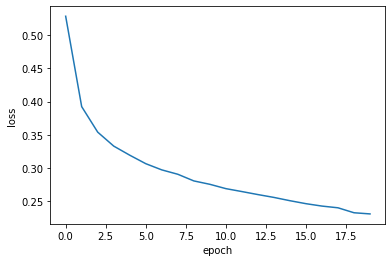

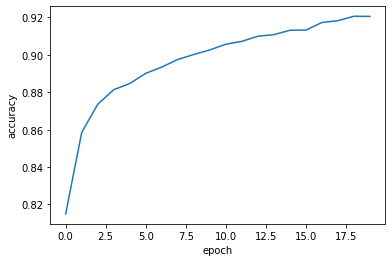

In [19]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [20]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5284278392791748, 0.39240750670433044, 0.35401079058647156, 0.3330039083957672, 0.31930986046791077, 0.30654242634773254, 0.2972061038017273, 0.2906211018562317, 0.2806061804294586, 0.27551329135894775, 0.2689947485923767, 0.26459380984306335, 0.2600535750389099, 0.2557690143585205, 0.2508273720741272, 0.24634942412376404, 0.24273237586021423, 0.24015146493911743, 0.2326911985874176, 0.2309446632862091]
[0.8149583339691162, 0.8585208058357239, 0.8735833168029785, 0.8813750147819519, 0.8846874833106995, 0.8901249766349792, 0.8934999704360962, 0.8975416421890259, 0.9002083539962769, 0.9026666879653931, 0.9057083129882812, 0.9072499871253967, 0.9099791646003723, 0.9108333587646484, 0.9131875038146973, 0.9132708311080933, 0.9173333048820496, 0.9182916879653931, 0.9206666946411133, 0.9205625057220459]


In [26]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history_RMS = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


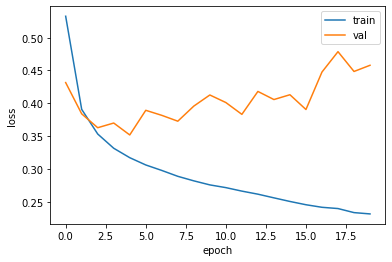

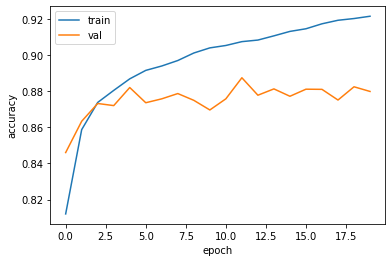

In [23]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [24]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


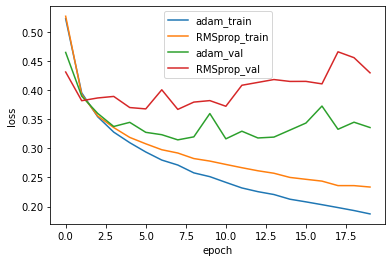

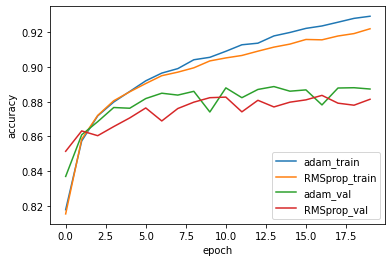

In [30]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history_RMS.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_RMS.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['adam_train', 'RMSprop_train', 'adam_val', 'RMSprop_val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history_RMS.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_RMS.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['adam_train', 'RMSprop_train', 'adam_val', 'RMSprop_val'])
plt.show()

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


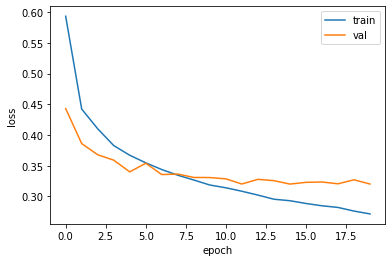

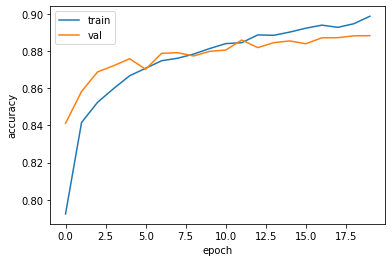

In [34]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [36]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8850


[0.31892770528793335, 0.8849999904632568]

In [50]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  if (a_layer):
    model.add(a_layer)
  
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape)

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
earlystop_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, earlystop_cb])

(48000, 28, 28)
Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5899 - accuracy: 0.7920 - val_loss: 0.4497 - val_accuracy: 0.8392
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8441 - val_loss: 0.4057 - val_accuracy: 0.8506
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4028 - accuracy: 0.8548 - val_loss: 0.3668 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3812 - accuracy: 0.8610 - val_loss: 0.3635 - val_accuracy: 0.8680
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8673 - val_loss: 0.3519 - val_accuracy: 0.8712
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3504 - accuracy: 0.8712 - val_loss: 0.3430 - val_accuracy: 0.8742
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3432 - accuracy: 0.8737 - val_loss: 0.3327

10


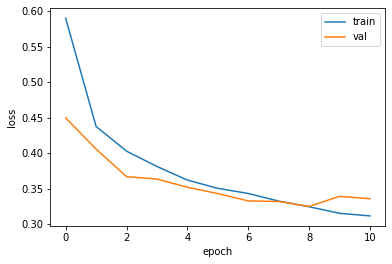

In [51]:
print(earlystop_cb.stopped_epoch)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()